In [35]:
import numpy as np
import pandas as pd
import csv
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import re

# data load, preprocessing
data = pd.read_csv('./dataset.txt', sep = ",", quoting=csv.QUOTE_NONE, encoding='utf-8')
texts = data['text_column']
labels = data['label_column']


In [37]:
from konlpy.tag import Okt

# 한국어 전처리 함수 정의
def preprocess_korean_text(text):
    # 한국어 형태소 분석기 (KoNLPy)를 사용하여 토큰화
    okt = Okt()
    words = okt.morphs(text, stem=True)
    text = ' '.join(words)
    
    # 특수 문자, 숫자, 공백 제거
    text = re.sub(r'[^가-힣\s]', '', text)
    text = ' '.join(text.split())  # 중복 공백 제거
    
    # 불용어 제거
    stopwords = ['을', '를', '이', '가', '은', '는', '에서', '에게', '에', '로', '으로', '도', '한', '그', '고', '와', '듯', '듯이', '만', '밖에']
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords]
    text = ' '.join(tokens)

    return text

# 텍스트 열에 전처리 함수 적용
texts = texts.apply(preprocess_korean_text)

In [38]:
print("amount of datas : " + str(texts.count()))

amount_of_food = 0
amount_of_it = 0
amount_of_school = 0
amount_of_sports = 0

for i in labels:
    if i == 0:
        amount_of_food += 1
    elif i == 1:
        amount_of_it += 1
    elif i == 2:
        amount_of_school += 1
    elif i == 3:
        amount_of_sports += 1

print("food_data : " + str(amount_of_food) + "\nit_data : " + str(amount_of_it) + "\nschool_data : " + str(amount_of_school) + "\nsports_data : " + str(amount_of_sports))

amount of datas : 14435
food_data : 4529
it_data : 3146
school_data : 3775
sports_data : 2700


In [39]:
print(texts[0])

오늘 뭐 먹다


In [40]:
# 한글 텍스트 형태소 분석
from konlpy.tag import Okt
okt = Okt()
#texts = texts.apply(lambda x: ' '.join(okt.morphs(x)))

tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(texts)
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=50)

In [41]:
print(texts[560])

감자 사용 요리 레시피 알다 감자 요리 좋아하다


In [42]:
print(labels)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
14430    3.0
14431    3.0
14432    3.0
14433    3.0
14434    3.0
Name: label_column, Length: 14435, dtype: float64


In [43]:
import numpy as np

# NaN 또는 무한대 값을 가지는 인덱스 검사
nan_indices = np.where(np.isnan(labels))
inf_indices = np.where(np.isinf(labels))

print("NaN 값을 가지는 인덱스:", nan_indices)
print("무한대 값을 가지는 인덱스:", inf_indices)


NaN 값을 가지는 인덱스: (array([  334,   390,   893,   987,   988,  1126,  1262,  1263,  1298,
        1491,  1606,  1683,  1743,  1744,  1748,  1749,  1750,  1755,
        1756,  1757,  1758,  1759,  1762,  1763,  1764,  1765,  1768,
        1769,  1772,  1773,  1775,  1777,  1778,  1780,  1785,  1787,
        1790,  1791,  1793,  1794,  1795,  1796,  1798,  1799,  1801,
        1803,  1805,  1815,  1816,  1817,  1824,  1825,  1828,  1830,
        1835,  1836,  1838,  2140,  2305,  2332,  2333,  2334,  2335,
        2336,  2337,  2338,  2339,  2397,  2398,  2435,  2454,  2466,
        2487,  2488,  2505,  2506,  2598,  2699,  2754,  2783,  2784,
        2823,  2824,  2934,  2935,  3012,  3013,  3014,  3015,  3016,
        3017,  3018,  3019,  3020,  3021,  3022,  3023,  3024,  3025,
        3026,  3027,  3028,  3046,  3182,  3183,  3237,  3267,  3268,
        3282,  3418,  3450,  3458,  3463,  3464,  3467,  3469,  3470,
        3474,  3479,  3481,  3482,  3483,  3488,  3489,  3490,  3491,
   

In [44]:
# multiclass label prepare
from keras.utils import to_categorical

mean_value = labels.mean()
labels.fillna(mean_value, inplace=True)

# labels 배열을 정수로 변환
labels = labels.astype(int)
y = to_categorical(labels, num_classes=4)  # amount of class

In [45]:
print(texts)

0                          오늘 뭐 먹다
1                        중국 음식 땡기다
2                           피자 시키다
3                       맵다 음식 좋아하다
4                           고기 땡기다
                   ...            
14430    규칙 적 인 운동 신체 점점 강하다 만듭니 다
14431           운동 우리 멘탈 건강 증진 시키다
14432     유산 운동 신체 의 강력하다 기초 제공 하다
14433           운동 우리 의 에너지 향상 시키다
14434         근력 훈련 근육 의 부피 증가 시키다
Name: text_column, Length: 14435, dtype: object


Epoch 1/20
93/93 [==============================] - 3s 16ms/step - loss: 1.2340 - accuracy: 0.5683 - val_loss: 1.0056 - val_accuracy: 0.7494
Epoch 2/20
93/93 [==============================] - 1s 13ms/step - loss: 0.7444 - accuracy: 0.8597 - val_loss: 0.5211 - val_accuracy: 0.9165
Epoch 3/20
93/93 [==============================] - 1s 13ms/step - loss: 0.3988 - accuracy: 0.9466 - val_loss: 0.3405 - val_accuracy: 0.9455
Epoch 4/20
93/93 [==============================] - 1s 14ms/step - loss: 0.2830 - accuracy: 0.9599 - val_loss: 0.2741 - val_accuracy: 0.9524
Epoch 5/20
93/93 [==============================] - 1s 13ms/step - loss: 0.2311 - accuracy: 0.9651 - val_loss: 0.2436 - val_accuracy: 0.9528
Epoch 6/20
93/93 [==============================] - 1s 13ms/step - loss: 0.1995 - accuracy: 0.9687 - val_loss: 0.2210 - val_accuracy: 0.9550
Epoch 7/20
93/93 [==============================] - 1s 14ms/step - loss: 0.1777 - accuracy: 0.9701 - val_loss: 0.2072 - val_accuracy: 0.9563
Epoch 8/20
93

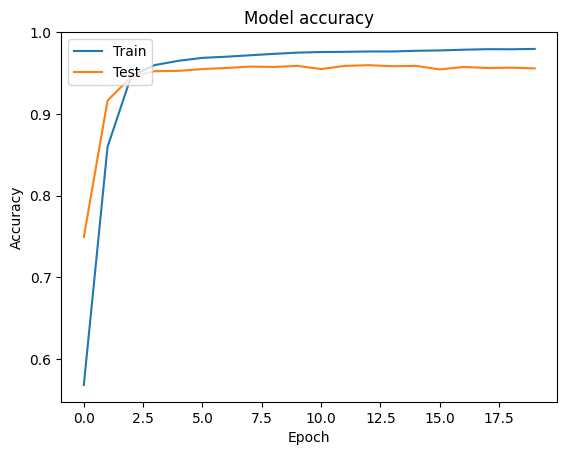

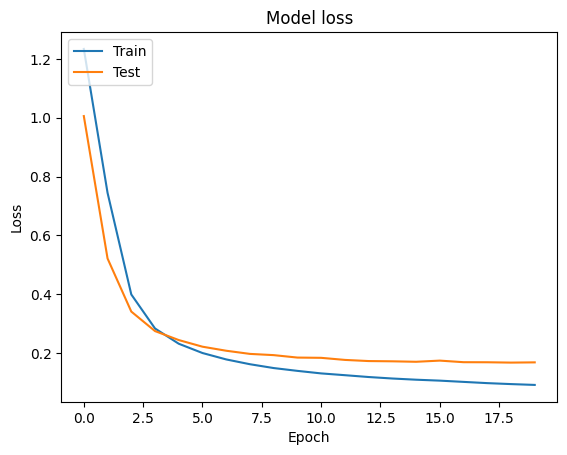

91/91 [==============================] - 0s 3ms/step - loss: 0.1556 - accuracy: 0.9629
Loss: 0.15556186437606812, Accuracy: 0.9629372954368591
학습된 모델이 저장되었습니다.


c:\Users\dargu\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:
# data divising
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model structure
model = Sequential()
model.add(Embedding(input_dim=500, output_dim=64, input_length=50))
model.add(LSTM(4))
model.add(Dense(4, activation='softmax'))  # print softmax of 4 class

# compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train
from keras.callbacks import EarlyStopping 
early_stopping = EarlyStopping(patience = 2) # protect overfitting

history = model.fit(X_train, y_train, epochs=20, batch_size=100, validation_split=0.2, verbose=1, callbacks = [early_stopping])
print(history.history)

# training visualizing (accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#training visualizing (loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# model save
model.save('./recog_situation_model.h5')
print("학습된 모델이 저장되었습니다.")

In [47]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 64)            32000     
                                                                 
 lstm_4 (LSTM)               (None, 4)                 1104      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
Total params: 33124 (129.39 KB)
Trainable params: 33124 (129.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
